In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17848 entries, 0 to 17847
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17848 non-null  int64  
 1   key                17848 non-null  object 
 2   fare_amount        17847 non-null  float64
 3   pickup_datetime    17847 non-null  object 
 4   pickup_longitude   17847 non-null  float64
 5   pickup_latitude    17847 non-null  float64
 6   dropoff_longitude  17847 non-null  float64
 7   dropoff_latitude   17847 non-null  float64
 8   passenger_count    17847 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.784800e+04,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000
mean,2.765310e+07,11.417429,-72.595005,39.951854,-72.580938,39.952298,1.672830
std,1.599173e+07,10.173691,11.458450,6.095753,10.197475,6.096021,1.295875
min,4.800000e+01,2.500000,-748.016667,-74.009697,-75.350437,-74.008745,0.000000
25%,1.383501e+07,6.000000,-73.992000,40.734977,-73.991591,40.733933,1.000000
50%,2.755475e+07,8.500000,-73.981823,40.752377,-73.980073,40.752884,1.000000
75%,4.140304e+07,12.500000,-73.967328,40.767152,-73.963307,40.768318,2.000000
max,5.542169e+07,350.000000,40.770667,41.366138,40.828377,41.366138,6.000000


In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [7]:
df.isna().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]


In [12]:
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)


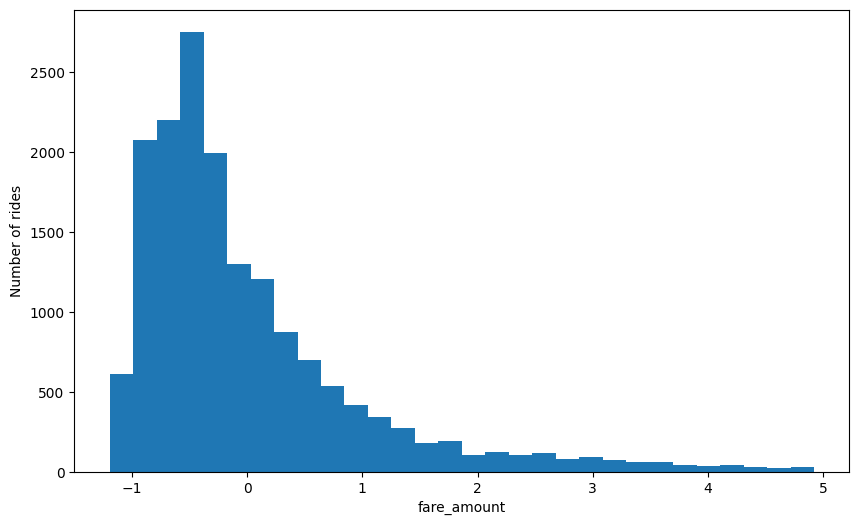

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df_scaled['fare_amount'],bins=30)
plt.xlabel("fare_amount")
plt.ylabel('Number of rides')
plt.show()
